# Tarea 5 - CIFAR-10 / Redes Neuronales Convolucionales (CNN)
## Variantes de arquitecturas CNN LeNet-5 y VGG
### ITESM - MCC
#### Tópicos selectos de AI

## Carlos E. Hdz Rincón - A011181616

## Imports

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report, confusion_matrix
import time
import random
from keras import regularizers

Using TensorFlow backend.


## 1. Realiza un breve resumen sobre en qué consisten las bases de datos CIFAR-10 y CIFAR-100.

CIFAR10 y CIFAR100 son datasets etiquetados curados por Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

### CIFAR-10

El dataset CIFAR10 consiste de 60,000 imágenes a color de un tamaño de 32x32 pixeles separados en 10 clases discretas.

El dataset está dividido en 50,000 imágenes de entrenamiento y 10,000 para prueba. El dataset está dividido en 5 lotes de entrenamiento y 1 lote de prueba, cada uno de 10,000 imágenes.

El lote de entrenamiento contiene 1,000 imágenes seleccionadas al azar para cada clase, mientras que el lote de entrenamiento tiene el resto de las imágenes sin un orden concreto.

Las clases son mutuamente exclusivas así que no hay ambigüedad entre ellas:

1. Avión
2. Automóvil
3. Pájaro
4. Gato
5. Ciervo
6. Perro
7. Rana
8. Caballo
9. Barco
10. Camión

### CIFAR100

Es muy similar a CIFAR10, pero contiene 100 clases con 600 imágenes cada una que, a su vez, están agrupadas en 20 super clases.

Cada clase está dividida en 500 imágenes de entrenamiento y 100 de prueba y tiene una etiqueta *fine* con la clase a la que pertenece y una etiqueta *coarse* con la superclase a la que pertenece.

Las clases y superclases son:


This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Here is the list of classes in the CIFAR-100:

| Superclass | Classes |
|------------|---------|
|aquatic mammals|	beaver, dolphin, otter, seal, whale|
|fish	|aquarium fish, flatfish, ray, shark, trout|
|flowers	|orchids, poppies, roses, sunflowers, tulips|
|food containers|	bottles, bowls, cans, cups, plates|
|fruit and vegetables|	apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|	clock, computer keyboard, lamp, telephone, television|
|household furniture|	bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
|medium-sized mammals|	fox, porcupine, possum, raccoon, skunk|
|non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles 1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles 2|	lawn-mower, rocket, streetcar, tank, tractor|



## 2. Carga de Datos
Deberás cargar los datos y hacer el procesamiento mínimo para normalizar los datos de entrada y
agregar las variables dicotómicas correspondientes a la variable de salida con el método one-hot
encoding. 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

readable_labels = ["Plane",
                   "Car",
                   "Bird",
                   "Cat",
                   "Deer",
                   "Dog",
                   "Frog",
                   "Horse",
                   "Ship",
                   "Truck"]

# Normalize input data
x_train, x_test = x_train/255.0, x_test/255.0

# One-hot encode the training and test classes
y_one_hot_train = tf.keras.utils.to_categorical(y_train)
y_one_hot_test = tf.keras.utils.to_categorical(y_test)

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(f"Training Data Shape: {x_train.shape}")
print(f"Test Data Data Shape: {x_test.shape}")

print("\n---------- RAW Label Data ------------")
print(f"Raw Training Label Shape: {y_train.shape}")
print(f"Raw Test Label Shape: {y_test.shape}")
print(f"Raw Test Label Sample: {y_test}")

print("\n---------- One-Hot Encoded Label Data ------------")

# One-hot encoded data 
print(f"One-hot encoded Training Label Shape: {y_one_hot_train.shape}")
print(f"One-hot encoded Test Label Shape: {y_one_hot_test.shape}")
print(f"One-hot encoded Test Label Sample: {y_one_hot_test}")

Training Data Shape: (50000, 32, 32, 3)
Test Data Data Shape: (10000, 32, 32, 3)

---------- RAW Label Data ------------
Raw Training Label Shape: (50000, 1)
Raw Test Label Shape: (10000, 1)
Raw Test Label Sample: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]

---------- One-Hot Encoded Label Data ------------
One-hot encoded Training Label Shape: (50000, 10)
One-hot encoded Test Label Shape: (10000, 10)
One-hot encoded Test Label Sample: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## 3. Muestra de dataset

Despliega al menos una imagen de cada una de las 10 clases del conjunto de entrenamiento y del conjunto de prueba. ¿Por qué consideras qué podría ser adecuado realizar este paso?

---
Porque permite inspeccionar el dataset tanto de entrenamiento como de prueba y asegurarse que las etiquetas estén correctas así como cerciorarse de cuánto
ruido puede haber en la imagen para anticipar cómo afinar el modelo a utilizar.


In [0]:
# First map all images to its classes to be able to pick one sample of each easily
#  this map will allow us with point 4 where we need to know how many pictures
#  are for each class.
def map_images_to_classes(images: list, labels: list) -> dict:
    images_by_class = {}
    
    for idx, image in enumerate(images):
        # The class is stored in a 1-D NpArray, so we need to unpack the value
        class_id = labels[idx][0]
        
        if class_id not in images_by_class:
            images_by_class[class_id] = [image]
        else:
            images_by_class[class_id].append(image)
    
    return images_by_class

# Use the original 0-9 classes instead of the one-hot encoding
training_images_by_class = map_images_to_classes(x_train, y_train)
test_images_by_class = map_images_to_classes(x_test, y_test)

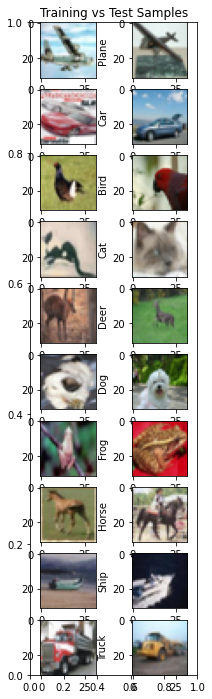

In [5]:
# Draw images
sample_fig = plt.figure(figsize=(3, 12))
plt.title("Training vs Test Samples")

rows = 10
columns = 2

plot_position = 0

for class_num in range(10): # For each of the 10 classes
    # In the training set there are 5000 images per class and in the test set
    #  there are 1000 per class

    training_image = random.choice(training_images_by_class[class_num])
    test_image = random.choice(test_images_by_class[class_num])

    plot_position += 1
    sample_fig.add_subplot(rows, columns, plot_position)
    plt.imshow(training_image)

    plot_position += 1
    sample_fig.add_subplot(rows, columns, plot_position)
    plt.imshow(test_image)
    plt.ylabel(readable_labels[class_num])

plt.show()

## 4. Descripción de dataset
Encuentre el número de imágenes que hay en cada una de las 10 clases, tanto del conjunto de entrenamiento como en el conjunto de prueba. ¿Por qué consideras qué podría ser adecuado realizar este paso?

---

Porque permite asegurarse que el dataset que se utilizará todas las imágenes que
esperamos y que el split entre training y test data set haya sido correcto.


In [6]:
print("-------------Training dataset summary-------------")

for class_id in range(10):
    print(f"For class ID {class_id} ({readable_labels[class_id]}) there are   \t\
            {len(training_images_by_class[class_id])} images")

print("\n\n-------------Test dataset summary-------------")

for class_id in range(10):
    print(f"For class ID {class_id} ({readable_labels[class_id]}) there are   \t\
            {len(test_images_by_class[class_id])} images")

-------------Training dataset summary-------------
For class ID 0 (Plane) there are   	            5000 images
For class ID 1 (Car) there are   	            5000 images
For class ID 2 (Bird) there are   	            5000 images
For class ID 3 (Cat) there are   	            5000 images
For class ID 4 (Deer) there are   	            5000 images
For class ID 5 (Dog) there are   	            5000 images
For class ID 6 (Frog) there are   	            5000 images
For class ID 7 (Horse) there are   	            5000 images
For class ID 8 (Ship) there are   	            5000 images
For class ID 9 (Truck) there are   	            5000 images


-------------Test dataset summary-------------
For class ID 0 (Plane) there are   	            1000 images
For class ID 1 (Car) there are   	            1000 images
For class ID 2 (Bird) there are   	            1000 images
For class ID 3 (Cat) there are   	            1000 images
For class ID 4 (Deer) there are   	            1000 images
For class ID 5 (

## 5. Optimizador mini-batch SGD

Utiliza el método de optimización mini-batch Gradiente Estocástico. Para ello deberás determinar el mejor valor que consideres para la tasa de aprendizaje (learning rate), el tamaño de cada bloque (batch size) y el número de épocas (epochs). Igualmente indica si fue conveniente utilizar el momentum y Nesterov.


---

El número de cada bloque (*batch*) debe ser un valor potencia de 2, 32 es un buen valor por defecto pero otros valores como 64 o 128 pueden ser utilizados.
*Masters & Luschi (2018)* recomiendan usar valores pequeños para el batch de no
más de 32, siendo 32 el que obtiene mejores resultados en la estabilidad del
entrenamiento y el rendimiento de la generalización.

La cantidad de pesos que son actualizados durante el entrenamiento se conoce
como la tasa de aprendizaje. La tasa de aprendizaje debe ser afinada de acuerdo al problema pero valores de 0.1 o 0.01 son buenos puntos iniciales. Para nuestro problema utilizaremos 0.01.

El momento es conveniente utilizarlo ya que puede facilitar el proceso de
aprendizaje y acelerar el proceso de entrenamiento. Valores usualmente usados para el momentum son 0.5, 0.9 y 0.99. *(Goodfellow et al., 2016)* Para nuestro problema utilizaremos 0.7

Usar Nesterov ayuda a reducir la posibilidad de evitar pasar el valor óptimo de error.

## 6. LeNet-5

### Utilidades para evaluación de modelo
Las siguientes funciones nos servirán para abstraer la generación del reporte del modelo para enfocarnos únicamente en los experimentos.

In [0]:
def compile_sgd_optimizer(model_to_fit: tf.python.keras.engine.training.Model,
                          epochs: int,
                          batch: int,
                          learning_rate: float,
                          momentum: float,
                          use_nesterov: bool = True) -> tf.python.keras.engine.training.Model:
    
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate,
                                    decay=learning_rate / epochs,
                                    momentum=momentum,
                                    nesterov=use_nesterov)
    
    #model_to_fit.compile(loss='categorical_crossentropy',
    #          optimizer=RMSprop(lr=learning_rate),
    #          metrics=['accuracy'])

    model_to_fit.compile(optimizer=optimizer,
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    return model_to_fit

In [0]:
def train_model(model_to_fit: tf.python.keras.engine.training.Model,
                epochs: int,
                batch: int,
                train_data: tuple,
                test_data: tuple):

    t = time.process_time()
    
    trained_model = model_to_fit.fit(train_data[0],
                                     train_data[1],
                                     validation_data=test_data,
                                     epochs=epochs, batch_size=batch)
    
    elapsed_time = time.process_time() - t
    
    print(f"\n\n ********* Training time: {elapsed_time} s.")
    return trained_model

In [0]:
def graph_loss_accuracy(h_model,
                        epochs: int,
                        subtitle: str = ""):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,epochs),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,epochs),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,epochs),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" 
              + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [0]:
# Helper functions for reporting

def evaluate_model(model_to_fit: tf.python.keras.engine.training.Model,
                   epochs: int,
                   batch: int,
                   learning_rate: float,
                   momentum: float,
                   train_tuple: tuple,
                   test_tuple: tuple,
                   labels: list,
                   use_nesterov: bool = True):
    
    subtitle = f"Epochs: {epochs} Batch: {batch} LR: {learning_rate}"

    model_to_fit = compile_sgd_optimizer(model_to_fit,
                               epochs,
                               batch,
                               learning_rate,
                               momentum,
                               use_nesterov)

    trained_model_history = train_model(model_to_fit,
                                epochs,
                                batch,
                                train_tuple,
                                test_tuple)
                                    
    model_to_fit.summary()

    model_predictions = model_to_fit.predict(x_test, batch_size=batch)

    # For classification_report the one_hot_encoding test labels are needed,
    #  these are passed in the test_tuple[1]
    print("\n\nClassification Report:")
    print(classification_report(test_tuple[1].argmax(axis=1), 
                            model_predictions.argmax(axis=1),
                            target_names=labels))
    
    print("\n\nConfusion Matrix:")
    print(confusion_matrix(test_tuple[1].argmax(axis=1),
                           model_predictions.argmax(axis=1)))
    
    graph_loss_accuracy(trained_model_history, epochs=epochs, subtitle=subtitle)

### Packt LeNet 

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5850 - accuracy: 0.4278 - val_loss: 1.2743 - val_accuracy: 0.5442
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2083 - accuracy: 0.5675 - val_loss: 1.0907 - val_accuracy: 0.6106
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0483 - accuracy: 0.6280 - val_loss: 0.9952 - val_accuracy: 0.6498
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9498 - accuracy: 0.6643 - val_loss: 0.9100 - val_accuracy: 0.6840
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8730 - accuracy: 0.6928 - val_loss: 0.8768 - val_accuracy: 0.6940
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8148 - accuracy: 0.7144 - val_loss: 0.8421 - val_accuracy: 0.7033
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7692 - accuracy: 0.7293 - val_loss: 0.8377 - val_accuracy:

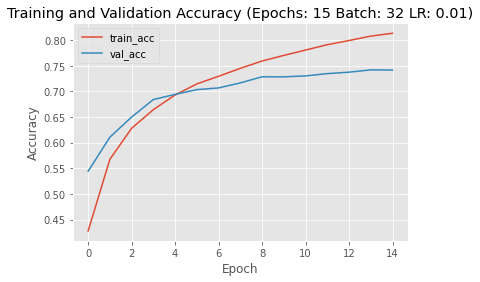

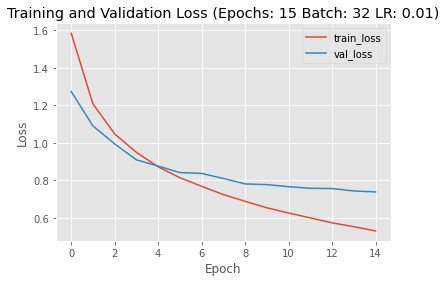

In [19]:
learning_rate=0.001

n_epochs = 10
batch_size = 100

#model.compile(loss='categorical_crossentropy',
#              optimizer=RMSprop(lr=learning_rate),
#              metrics=['accuracy'])

lenet5_packt_model = tf.keras.models.Sequential([

    #C1 - feature maps - Convolutional layer:
    tf.keras.layers.Conv2D(filters=32, 
                 kernel_size=4, 
                 padding='same',
                 activation='relu',
                 input_shape=(32,32,3)
                ),

     #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   tf.keras.layers.Dropout(0.2),

   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=64, 
                 kernel_size=4, 
                 padding='same', 
                 activation='relu'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   tf.keras.layers.Dropout(0.2),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(1024, activation='relu'),

   tf.keras.layers.Dropout(0.2),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

evaluate_model(lenet5_packt_model,
               epochs=15,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.1 LeNet-5 sin Batch Normalization

A partir del mejor modelo encontrado utilizando la arquitectura de la red neuronal convolucional (CNN) LeNet-5 como fue definida en el artículo original (página 7): http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf, responde a los siguientes incisos para tu mejor modelo encontrado (utiliza la función de activación sigmoide en las capas ocultas y la función tangente hiperbólica en las capas de salida):

1. Tiempo de entrenamiento del modelo.
2. Cantidad de parámetros del modelo.
3. El reporte de las predicciones del conjunto de prueba con las métricas precisión, recall y f1-score.
4. Las gráficas de la precisión (accuracy) y el error de los conjuntos de entrenamiento y prueba.
5. La tabla de confusión de las predicciones con respecto a las etiquetas reales del conjunto de prueba.
6. Reporta tus conclusiones de los resultados obtenidos.

---

### Conclusiones

El modelo corrido con los hiperparámetros obtenidos después de experimentación:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.7
* Engine: GPU

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* Epochs: 50
    * Training Accuracy: 63.43%
    * Test Accuracy: 59%
    * Time: 569.58s
* Epochs: 100 - Test Accuracy:
    * Training Accuracy: 82%
    * Test Accuracy: 63%
    * Time: 1134.10

Si bien el Accuracy en Training parece subir de manera estable con más epochs, las gráficas muestras un overfitting que empeora cuanto más epochs sean utilizados, lo cual indica que el modelo no está generalizando y probablemente no lo hará.



#### 6.1.1. Sin Batch Normalization, 100 Epochs
Las variable de epoch, learning rate y momentum se indican en la llamada a evaluate_model

Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3220 - accuracy: 0.0983 - val_loss: 2.3144 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2523 - accuracy: 0.1363 - val_loss: 2.0915 - val_accuracy: 0.2345
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9437 - accuracy: 0.2868 - val_loss: 1.8142 - val_accuracy: 0.3449
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7459 - accuracy: 0.3731 - val_loss: 1.7009 - val_accuracy: 0.3883
Epoch 5/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6170 - accuracy: 0.4160 - val_loss: 1.5681 - val_accuracy: 0.4319
Epoch 6/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5241 - accuracy: 0.4491 - val_loss: 1.4883 - val_accuracy: 0.4615
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4556 - accuracy: 0.4718 - val_loss: 1.4298 -

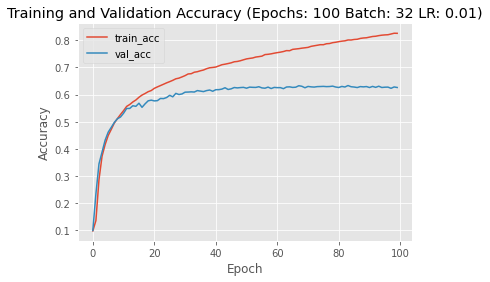

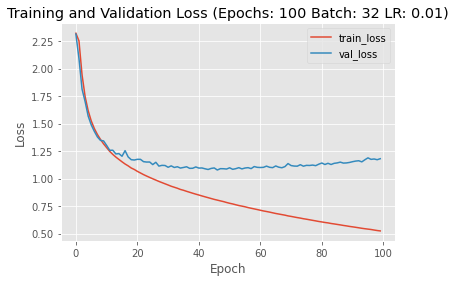

In [0]:
lenet5_no_bn_model = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_no_bn_model,
               epochs=100,
               batch=32,
               learning_rate=0.01,
               momentum=0.7,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)


#### 6.1.2. Sin Batch L1 Regularizers, 50 Epochs

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7667 - accuracy: 0.3601 - val_loss: 1.6666 - val_accuracy: 0.4031
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5661 - accuracy: 0.4307 - val_loss: 1.4816 - val_accuracy: 0.4653
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5056 - accuracy: 0.4545 - val_loss: 1.3660 - val_accuracy: 0.5061
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4688 - accuracy: 0.4681 - val_loss: 1.5181 - val_accuracy: 0.4477
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4462 - accuracy: 0.4783 - val_loss: 1.4265 - val_accuracy: 0.4943
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4260 - accuracy: 0.4837 - val_loss: 1.3718 - val_accuracy: 0.5058
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4065 - accuracy: 0.4922 - val_loss: 1.3229 - val_accura

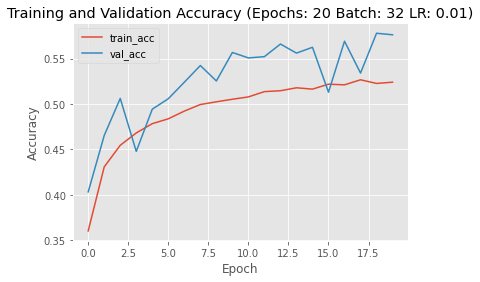

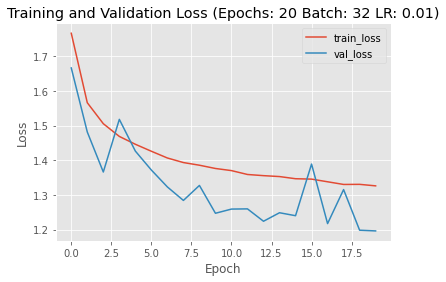

In [0]:
lenet5_no_bn_model = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',
                          #kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                          ),
   tf.keras.layers.BatchNormalization(axis = -1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Dropout(0.25),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid',
                          #kernel_regularizer=regularizers.l2(0.01)
                          ),
   tf.keras.layers.BatchNormalization(axis = -1),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh',
                         #kernel_regularizer=regularizers.l2(0.01)
                         ),
   tf.keras.layers.BatchNormalization(axis = -1),

   tf.keras.layers.Dropout(0.3),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh',
                         #kernel_regularizer=regularizers.l2(0.01)
                         ),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_no_bn_model,
               epochs=20,
               batch=32,
               learning_rate=0.01,
               momentum=0.7,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### Keras Example

Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7009 - accuracy: 0.3791 - val_loss: 1.3021 - val_accuracy: 0.5389
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3076 - accuracy: 0.5290 - val_loss: 1.1124 - val_accuracy: 0.6098
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1479 - accuracy: 0.5899 - val_loss: 0.9736 - val_accuracy: 0.6533
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0379 - accuracy: 0.6341 - val_loss: 0.9443 - val_accuracy: 0.6673
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9582 - accuracy: 0.6592 - val_loss: 0.8840 - val_accuracy: 0.6915
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8877 - accuracy: 0.6855 - val_loss: 0.8317 - val_accuracy: 0.7097
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8421 - accuracy: 0.7014 - val_loss: 0.8283 - val_ac

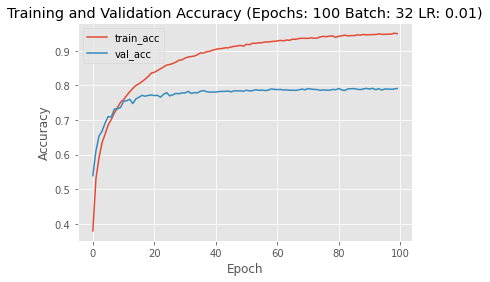

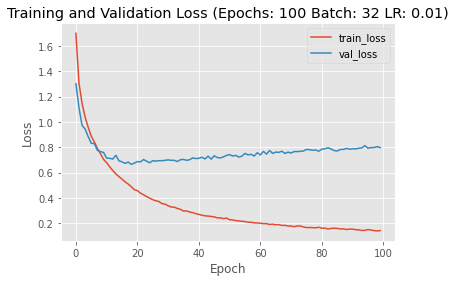

In [0]:
keras_example = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:], activation="relu"),
   #tf.keras.layers.BatchNormalization(axis = -1),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   tf.keras.layers.Dropout(0.25),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
   #tf.keras.layers.BatchNormalization(axis = -1),

   tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

   tf.keras.layers.Dropout(0.25),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(512, activation='relu',
                         #kernel_regularizer=regularizers.l2(0.01)
                         ),
   #tf.keras.layers.BatchNormalization(axis = -1),

   tf.keras.layers.Dropout(0.5),

   #FC-6 - Fully connected layer:
   #tf.keras.layers.Dense(84, activation='tanh',
                         #kernel_regularizer=regularizers.l2(0.01)
   #                      ),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(keras_example,
               epochs=100,
               batch=32,
               learning_rate=0.01,
               momentum=0.9,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.2 LeNet-5 con Batch Normalization
Incluye ahora en el modelo de la CNN la normalización por bloques (Batch NormalizationBN) y repite los incisos “a” a “f”. Deberás indicar si resulta mejor usar BN antes o después de las funciones de activación. Además, indica qué observas en las gráficas de precisión y error con respecto al caso anterior.

---

### Conclusiones

El modelo corrido con los hiperparámetros:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.7
* Engine: GPU
* Batch: 50
* BatchNormalization

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* BN Antes de activación:
    * Training Accuracy: 90%
    * Test Accuracy: 66%
    * Time: 589.04s
* BN Después de activación:
    * Training Accuracy: 99.88%
    * Test Accuracy: 61%
    * Time: 588.35s

El tiempo de entrenamiento sube un poco más por epoch, muy probablemente debido a las operaciones de normalización, pero el accuracy en training sube más rápidamente comparado a no tener Batch Normalization.

El accuracy de entrenamiento es mejor con BN pero el overfitting es mucho más evidente incluso a 50 epochs. El modelo sigue sin generalizar de manera adecuada a los datos de prueba, esto se puede apreciar mucho con las gráficas de loss sin BN comparadas con las que sí tiene BN, independientemente de si el BN se aplica antes o después.

En este caso en particular, BN antes de la función de activación parece tener un mejor resultado en el accuracy de las pruebas.

#### 6.2.1. LeNet-5 Batch Normalized, 50 Epochs, BN antes de activación

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6633 - accuracy: 0.3982 - val_loss: 1.4403 - val_accuracy: 0.4831
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3724 - accuracy: 0.5081 - val_loss: 1.2899 - val_accuracy: 0.5353
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2349 - accuracy: 0.5605 - val_loss: 1.1976 - val_accuracy: 0.5701
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1443 - accuracy: 0.5930 - val_loss: 1.1323 - val_accuracy: 0.5961
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0737 - accuracy: 0.6203 - val_loss: 1.1147 - val_accuracy: 0.5979
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0173 - accuracy: 0.6426 - val_loss: 1.0700 - val_accuracy: 0.6199
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9720 - accuracy: 0.6582 - val_loss: 1.0510 - val_ac

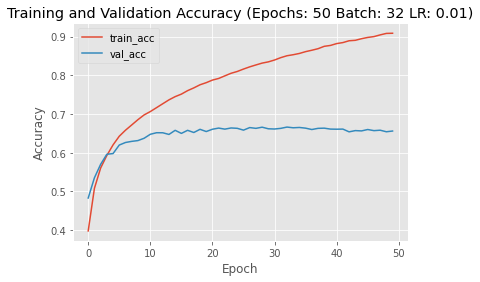

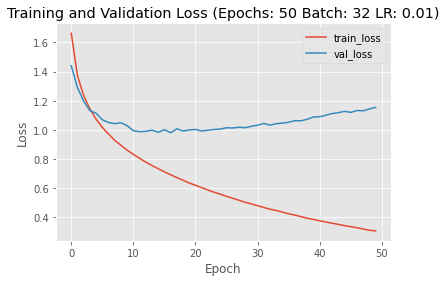

In [0]:
lenet5_with_bn_before_model = tf.keras.models.Sequential([
   #BN Before C1 Activation
   tf.keras.layers.BatchNormalization(axis=1),
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   # Batch Normalization before C3 Activation Function
   tf.keras.layers.BatchNormalization(axis=1),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_with_bn_before_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.7,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

#### 6.2.2. LeNet-5 Batch Normalized, 50 Epochs, BN después de activación

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5893 - accuracy: 0.4294 - val_loss: 1.4496 - val_accuracy: 0.4868
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2673 - accuracy: 0.5506 - val_loss: 1.3025 - val_accuracy: 0.5474
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1208 - accuracy: 0.6025 - val_loss: 1.1979 - val_accuracy: 0.5719
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0182 - accuracy: 0.6437 - val_loss: 1.1195 - val_accuracy: 0.6035
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9309 - accuracy: 0.6747 - val_loss: 1.0906 - val_accuracy: 0.6166
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8599 - accuracy: 0.6974 - val_loss: 1.0899 - val_accuracy: 0.6194
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7936 - accuracy: 0.7234 - val_loss: 1.1140 - val_ac

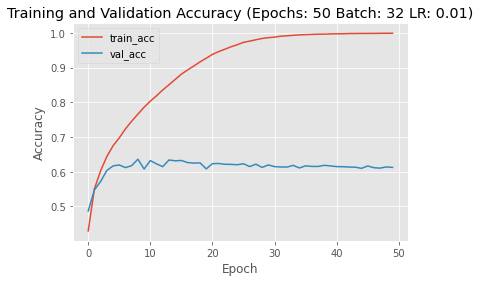

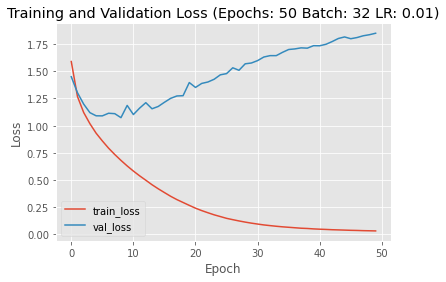

In [0]:
lenet5_with_bn_after_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=1, momentum=0.0),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=1, momentum=0.0),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_with_bn_after_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.7,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.3 Average Pooling
Utiliza el método de AveragePooling en lugar del MaxPooling y reporta tus conclusiones.

---

### Conclusiones

El modelo corrido con los hiperparámetros:
* Learning Rate: 0.01
* Batch: 32
* Momentum Nesterov: 0.7
* Engine: GPU
* Batch: 50
* BatchNormalization después de cada convolución

Parece tener un accuracy en las pruebas de alrededor 60% que no mejora significativamente con más epochs:

* MaxPooling (De acuerdo a resultados anteriores):
    * Training Accuracy: 99.88%
    * Test Accuracy: 61%
    * Time: 588.35s
* AvgPooling (De acuerdo a resultados anteriores):
    * Training Accuracy: %
    * Test Accuracy: %
    * Time: s

TBD

El tiempo de entrenamiento sube un poco más por epoch, muy probablemente debido a las operaciones de normalización, pero el accuracy en training sube más rápidamente comparado a no tener Batch Normalization.

El accuracy de entrenamiento es mejor con BN pero el overfitting es mucho más evidente incluso a 50 epochs. El modelo sigue sin generalizar de manera adecuada a los datos de prueba, esto se puede apreciar mucho con las gráficas de loss sin BN comparadas con las que sí tiene BN, independientemente de si el BN se aplica antes o después.

En este caso en particular, BN antes de la función de activación parece tener un mejor resultado en el accuracy de las pruebas.

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6688 - accuracy: 0.4014 - val_loss: 1.4728 - val_accuracy: 0.4750
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4087 - accuracy: 0.4959 - val_loss: 1.4125 - val_accuracy: 0.4985
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2789 - accuracy: 0.5417 - val_loss: 1.3038 - val_accuracy: 0.5330
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1805 - accuracy: 0.5796 - val_loss: 1.2689 - val_accuracy: 0.5464
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1019 - accuracy: 0.6108 - val_loss: 1.2418 - val_accuracy: 0.5618
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0367 - accuracy: 0.6335 - val_loss: 1.2220 - val_accuracy: 0.5726
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9754 - accuracy: 0.6559 - val_loss: 1.2028 - val_ac

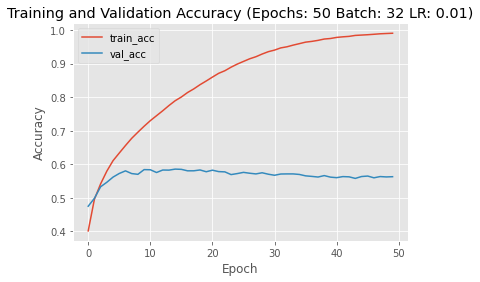

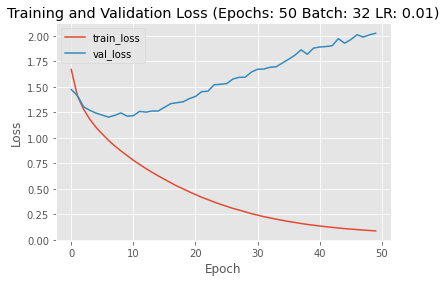

In [0]:
# TODO Try another version of Lenet5, this one SUCKS

lenet5_avg_pooling_model = tf.keras.models.Sequential([
   
   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='sigmoid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=1, momentum=0.0),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
   
   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='sigmoid', padding='valid'),

   #BN After C1 Activation
   tf.keras.layers.BatchNormalization(axis=1, momentum=0.0),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='tanh'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])


evaluate_model(lenet5_avg_pooling_model,
               epochs=50,
               batch=32,
               learning_rate=0.01,
               momentum=0.7,
               train_tuple=(x_train, y_one_hot_train),
               test_tuple=(x_test, y_one_hot_test),
               labels=readable_labels,
               use_nesterov = True)

### 6.4 Funciones de activación
En el siguiente inciso deberás indicar qué funciones de activación resultan mejor utilizar en relación a la sigmoide, tanh y relu. Es decir, indica cuál fue la mejor configuración encontrada: que todas sean sigmoide; todas tanh todas relu; que en las capas ocultas se use relu y en las de salida la tanh, etc. Reporta tus resultados. Considerando los resultados de los incisos anteriores, aplica además los ajustes que mejor consideres.

### 6.5 Métodos de regularización 
Investiga para qué se utilizan los métodos de regularización en una CNN. Puedes consultar el capítulo 7 del libro Deep Learning de Ian Goodfellow/Yoshua Bengio / Aaron Courville. Es de acceso libre: https://www.deeplearningbook.org/. Reporta en un párrafo tus conclusiones.

---
# TBD TBD TBD TBD


### 6.6 Método de regularización Dropout
Investiga en qué consiste el método de regularización Dropout. Puedes consultar la sección 7.12 del libro de Ian Goodfellow. Reporta en un párrafo tus conclusiones.
---
# TBD TBD TBD


#### 6.6.1. Aplicando Dropout
Aplica el método de Dropout a tu modelo ( https://keras.io/layers/core/ ) con valor de 0.5 y comenta los resultados obtenidos. En particular, indica el cambio importante que observas en las gráficas de la precisión y errores, con respecto a las anteriores gráficas.

#### 6.6.2. Afinando Dropout
Busca el mejor valor de Dropout que consideres adecuado e igualmente, aplica todos los otros cambios que consideres mejor para tu modelo. En general, el valor del Dropout en las capas ocultas oscila entre 0.1 y 0.25 y en las de capas de salida entre 0.25 y 0.5. Reporta tus conclusiones. 

## 7. Arquitectura Visual Geometric Group (VGG)

El siguiente ejercicio utilizará la misma base de datos anterior, CIFAR-10, pero tomando como base una de las arquitecturas propuestas por el grupo Visual Geometric Group de la Universidad de Oxford, liderados por Andrew Zisserman y Andrea Vedaldi: https://www.robots.ox.ac.uk/~vgg/.

En la Tabla 1 de la página 3 se muestran las arquitecturas propuestas por los autores en el artículo de 2015 y donde la entrada era para imágenes de tamaño 224x224x3:

https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/simonyan15.pdf

En nuestro caso, como las imágenes de CIFAR-10 son más pequeñas, 32x32, debemos adaptar de alguna manera la arquitectura VGG, no solamente en el tamaño de las imágenes de entrada, sino en la cantidad de capas MaxPooling que podrías ser aplicadas y la cantidad de filtros en cada capa convolucional. Para ello considera los siguientes ajustes, toma como referencia la columna B de la Tabla 1, página 3, del artículo de Simoyan & Zisserman:

* Las imágenes de entrada serán de tamaño, 32x32x3, ya que son las imágenes de
color de CIFAR-10.
* Aplicaremos solamente los primeros dos bloques de las capas ocultas. ¿Porqué no tendría sentido aplicar aquí los otros tres bloques que se indican en la Tabla del artículo?
* Como nuestras imágenes son más pequeñas, usaremos la mitad de los filtros en cada uno de los dos bloques de las capas ocultas, es decir, en este caso 32 y 64.
* En las capas de salida, como los autores la definieron para un conjunto de 1000 clases y nosotros tenemos solamente 100, entonces deberás ajustar dichas capas de salida al 10%. Ajustando los valores a potencias de 2, quedarían dos capas de FC-512, una FC-10. Pero nuevamente, como nosotros tenemos menos pixeles qué procesar, con una sola capa podría ser suficiente.

* Lee la sección 2.1, página 2, del artículo de Simoyan & Zisserman para los
parámetros stride, funciones de activación y Padding de cada etapa.
* Utiliza Batch-Normalization y Dropout donde lo consideres adecuado.
* Utiliza Gradiente Descendente por mini-bloques como método de optimización y
con los parámetros que consideres adecuados. Igualmente determina los mejores
valores para Epochs y batch-size.
* Es decir, finalmente debes implementar una CNN con la siguiente arquitectura.

|Variante arquitectura VGG|Input ( 32 x 32 RGB image )|
|-------------------------|:------:|
|Capas ocultas - Bloque 1 |conv3-32|
|                         |conv3-32|
|                         |maxpool |
|Capas ocultas - Bloque 2 |conv3-64|
|                         |conv3-64|
|                         |maxpool |
|Capas Densas (Fully-Connected) de salida|FC-512|
|                         |FC-10   |
|                         |Soft-max|

* Incluye el reporte de las métricas precisión, recall, f1-score; las gráficas de los errores y desempeño del mejor modelo.
* En particular, muestra la matriz de confusión y algunas de las imágenes de las
clases en las que mayormente se equivocó el modelo.
* Una vez obtenido el mejor modelo, repítelo 10 veces y reporta el valor promedio de las métricas precisión, recall y f1-score.
* Reporta tus conclusiones finales de esta arquitectura y en comparación con los
resultados obtenidos con LeNet-5.

---
1. ¿Porqué no tendría sentido aplicar aquí los otros tres bloques que se indican en la Tabla del artículo?
2. Conclusiones